## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              92.93
Date:                Tue, 17 May 2022   Prob (F-statistic):                   8.53e-111
Time:                        20:18:46   Log-Likelihood:                         -269.85
No. Observations:                 404   AIC:                                      565.7
Df Residuals:                     391   BIC:                                      617.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

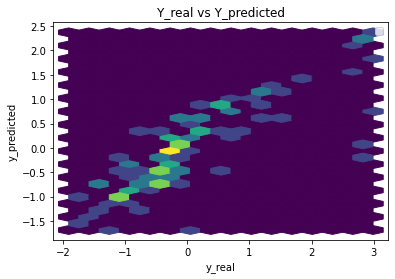

Performance Metrics
Mean Squared Error: 0.44043461270943435
Mean Absolute Error: 0.4080748583849312
Manhattan distance: 41.62363555526299
Euclidean distance: 6.702561487697243


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print(mae_cb)

Learning rate set to 0.033215
0:	learn: 0.9343982	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9155992	total: 59.9ms	remaining: 29.9s
2:	learn: 0.8971354	total: 60.9ms	remaining: 20.2s
3:	learn: 0.8802662	total: 61.8ms	remaining: 15.4s
4:	learn: 0.8654398	total: 62.8ms	remaining: 12.5s
5:	learn: 0.8493366	total: 63.7ms	remaining: 10.6s
6:	learn: 0.8345179	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8191469	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8041656	total: 66.3ms	remaining: 7.3s
9:	learn: 0.7878075	total: 67.1ms	remaining: 6.65s
10:	learn: 0.7737358	total: 67.9ms	remaining: 6.11s
11:	learn: 0.7589396	total: 68.9ms	remaining: 5.68s
12:	learn: 0.7451882	total: 70ms	remaining: 5.32s
13:	learn: 0.7302732	total: 70.9ms	remaining: 5s
14:	learn: 0.7186821	total: 71.8ms	remaining: 4.71s
15:	learn: 0.7049419	total: 72.6ms	remaining: 4.47s
16:	learn: 0.6934050	total: 73.4ms	remaining: 4.25s
17:	learn: 0.6815303	total: 74.3ms	remaining: 4.05s
18:	learn: 0.6695241	total: 75ms	remaining: 3.87s


0.24076096420465687
